# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

¡Bienvenidos al primer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.

Vamos a enfocarnos en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero debemos limpiar un poco el dataset.

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

## Los atributos
A continuación vamos a describir los atributos que consideramos en esta muestra:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las bibliotecas numpy, pandas, matplotlib.pylab y seaborn. 

** 1) Importá ** cada una de ellas con los siguientes nombres: 
- **numpy** como **np**
- **pandas** como **pd**
- **matplotlib.pylab** como **plt**
- **seaborn** como **sns**


In [3]:
# Importar bibliotecas en esta celda
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Cargando dataset de propiedades

**2) Cargá** el dataset que se encuentra en la carpeta *dataset/* y guardalo en una variable llamada **df**. 
No te olvides de utilizar **parse_dates** sobre la columna **created_on**


In [9]:
df = pd.read_csv('./entrega+1/dataset/datos_properati.csv')

## Exploración de datos

Lo primero que vamos a hacer es ver qué forma tiene el dataset que acabamos de cargar. Para eso vamos a mostrar las primeras 3 entradas del mismo y utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [10]:
print(df.shape)
df.head(20)

(18979, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.0,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


## Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

**3) Mostrá** las categorías de `property_type` y cuántas instancias hay de cada una.

Recordá utilizar funciones del **dataframe** de pandas para realizar esto.

In [11]:
# mostrá las categorías del campo property_type y mostrá la cant. de valores en esta celda
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtrando las categorías

De las categorías existentes sólo queremos quedarnos con las que sean casas (house), departamentos (apartment) o PH (PH). 

Para esto, 

**4) filtrá** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguirás usando a lo largo del análisis.


In [12]:
# Filtrá el dataframe en esta celda
df_filtered = df.copy()

In [13]:
property_type = ['house', 'apartment', 'PH'] # esto es por si hay otro tipo de propiedad en un data set mas grande
df_filtered.drop(df_filtered[~df_filtered.property_type.isin(property_type)].index, inplace =True)  # se obtiene todo lo diferente a property_type array
df_filtered.property_type.value_counts() #se verifica que sean los mismos valores que df.property_type.value_counts() pero sin los demas property_type

apartment    14807
house         1618
PH            1463
Name: property_type, dtype: int64

In [28]:
df_filtered2 = df.copy()
#df_filtered2.loc[~(df_filtered2.property_type=='store')]
df_filtered2.loc[df_filtered2.property_type!='store']
#df_filtered2[df_filtered2.property_type.isin(['house', 'apartment', 'PH'])]
df_filtered2.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Visualizando las categorías
**5)** Utilizando `seaborn` **creá un countplot** para visualizar las categorías de `df_filtered` en el campo `property_type` 

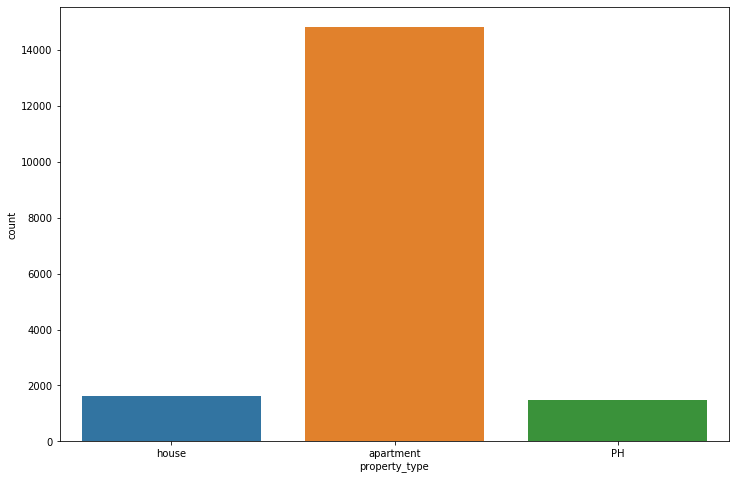

In [14]:
# Visualizá las categorías en esta celda

ax = sns.countplot(x="property_type", data=df_filtered)

## Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.

**6) Quitá** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

In [15]:
# Quitá las instancias con valores nules en esta celda
numero_de_instancias = df_filtered.shape[0]
df_filtered.dropna(subset=['surface_total_in_m2', 'surface_covered_in_m2','price_usd_per_m2','price_aprox_usd', 'rooms'],axis=0, inplace= True)
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.00,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_departamento_villa-soldati_re-max-parque,VILLA SOLDATI,8.0
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


**7)** A continuación **mostrá** cuantas instancias son las que descartaste a partir de quitar las que tenían valores nulos.

In [16]:
# Mostrá en esta celda la cantidad de instancias descartadas


print("Se eliminaron", numero_de_instancias - df_filtered.shape[0], "instancias")

Se eliminaron 5913 instancias


Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

**8) Mostrá** qué otros atributos tienen valores faltantes en el `dataframe`.

In [17]:
attributes = df_filtered.columns[df_filtered.isna().any(axis=0) == True]
numero_filas = len(df_filtered)
for attr in attributes:
    print("Atributo ", attr, " contiene ", len(df_filtered[attr].isna()), "datos faltantes de ", numero_filas, "filas")


Atributo  floor  contiene  11975 datos faltantes de  11975 filas
Atributo  expenses  contiene  11975 datos faltantes de  11975 filas


In [29]:
df_filtered.columns[df_filtered.isna().any()].tolist()  

['floor', 'expenses']

#### Desafío: planteá alguna estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`.

In [31]:
df_filtered_2 = df.copy()
df_filtered_2.dropna(subset=['price_usd_per_m2','price_aprox_usd'],axis=0, inplace= True) # eliminar datos price_usd_per_m2 y price_aprox_usd
df_filtered_2.surface_total_in_m2 = df_filtered_2.price_aprox_usd / df_filtered_2.price_usd_per_m2 #dividir  las dos columnas para rellenar datos faltantes
df_filtered_2

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_departamento_villa-soldati_re-max-parque,VILLA SOLDATI,8.0
18974,2018-01-08,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.668741,-58.443146",-34.668741,-58.443146,60000.00,55.0,55.0,1090.909091,NaN,3.0,NaN,https://www.properati.com.ar/1jcpm_venta_departamento_villa-soldati_roca-cnel-av-_3500_subte-premetro_re-max-parque,VILLA SOLDATI,8.0
18975,2018-01-23,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.66417,-58.443317",-34.664170,-58.443317,99000.00,115.0,82.0,860.869565,NaN,3.0,NaN,https://www.properati.com.ar/1k1hs_venta_casa_villa-soldati_lavadero_parrilla_terraza_garage_placard_subte-premetro_re-max-acci-oacute-n,VILLA SOLDATI,8.0
18977,2018-01-27,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.665005,-58.443041",-34.665005,-58.443041,50433.01,45.0,45.0,1120.733556,NaN,3.0,NaN,https://www.properati.com.ar/1k5v0_venta_departamento_villa-soldati_lavadero_subte-premetro_re-max-ayres,VILLA SOLDATI,8.0


## Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 

Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

**9) Mostrá** cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada `wrong_surface_rows`

In [32]:
wrong_surface_rows = df_filtered[df_filtered['surface_total_in_m2'] < df_filtered['surface_covered_in_m2']]

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [33]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2


Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [39]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.584773  -58.442125    5
-34.575434  -58.472537    5
-34.572642  -58.474683    5
-34.592770  -58.476289    5
-34.592564  -58.434237    5
-34.621513  -58.453359    5
-34.621353  -58.460433    5
-34.574537  -58.455439    5
-34.589111  -58.415627    5
-34.611042  -58.362606    5
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [40]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])
df_filtered = df_filtered[df_filtered.conteo <= 5]

Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [41]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [42]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [43]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [44]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.995238
RETIRO           0.992647
SAN NICOLAS      0.989011
RECOLETA         0.987342
BELGRANO         0.952446
Name: property_type, dtype: float64
Barrios con mayor porcentaje de casas y phs: 
  barrio
VERSALLES            0.622222
MATADEROS            0.612500
PARQUE AVELLANEDA    0.560606
VILLA RIACHUELO      0.555556
VILLA REAL           0.500000
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

In [ ]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [340]:
# Mostrá en esta celda los cálculos

media = df_filtered.price_usd_per_m2.mean()
mediana = df_filtered.price_usd_per_m2.median()
moda = df_filtered.price_usd_per_m2.mode()
std = df_filtered.price_usd_per_m2.std()
_min = df_filtered.price_usd_per_m2.min()
_max = df_filtered.price_usd_per_m2.max()
print("""
    Minimo: %d
    Maximo: %d
    Media: %d
    Mediana: %d
    Moda: %d
    Desvio estandar: %d
""" % (_min, _max,media,mediana,moda, std))


    Minimo: 1552
    Maximo: 4095
    Media: 2632
    Mediana: 2588
    Moda: 2500
    Desvio estandar: 607



También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [331]:
# Mostrá los cuartiles en esta celda
primer_cuartil = cuartiles = df_filtered.price_usd_per_m2.quantile(.25)
tercer_cuartil = cuartiles = df_filtered.price_usd_per_m2.quantile(.75)
print("Primer cuartil", primer_cuartil)
print("Primer cuartil", tercer_cuartil)
print("Rango intercuartilico ", tercer_cuartil - primer_cuartil)

Primer cuartil 2150.7936507936506
Primer cuartil 3057.142857142857
Rango intercuartilico  906.3492063492063


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [325]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [341]:
# Realizá los calculos en esta celda

media = df_filtered.price_usd_per_m2.mean()
mediana = df_filtered.price_usd_per_m2.median()
moda = df_filtered.price_usd_per_m2.mode()
std = df_filtered.price_usd_per_m2.std()
_min = df_filtered.price_usd_per_m2.min()
_max = df_filtered.price_usd_per_m2.max()
print("""
    Minimo: %d
    Maximo: %d
    Media: %d
    Mediana: %d
    Moda: %d
    Desvio estandar: %d
""" % (_min, _max,media,mediana,moda, std))


    Minimo: 1552
    Maximo: 4095
    Media: 2632
    Mediana: 2588
    Moda: 2500
    Desvio estandar: 607



Vamos a graficar ahora los barrios según el precio por metro cuadrado.

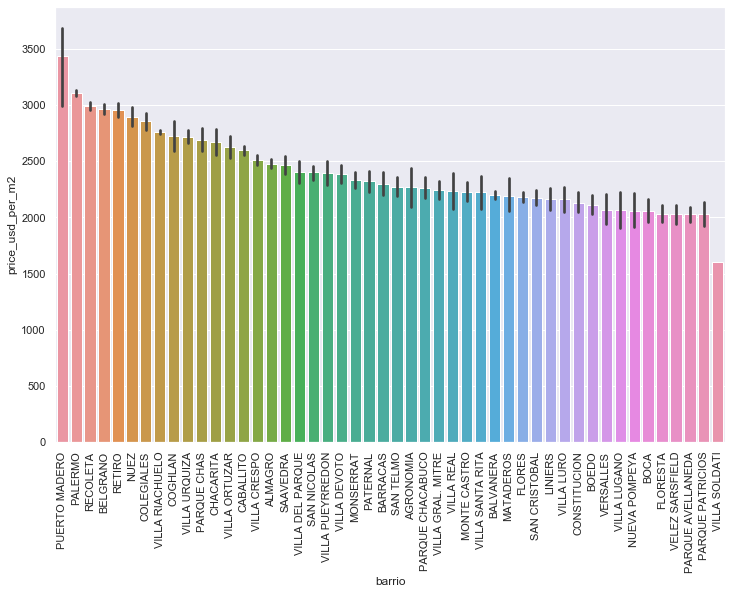

In [342]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [359]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [360]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [374]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index


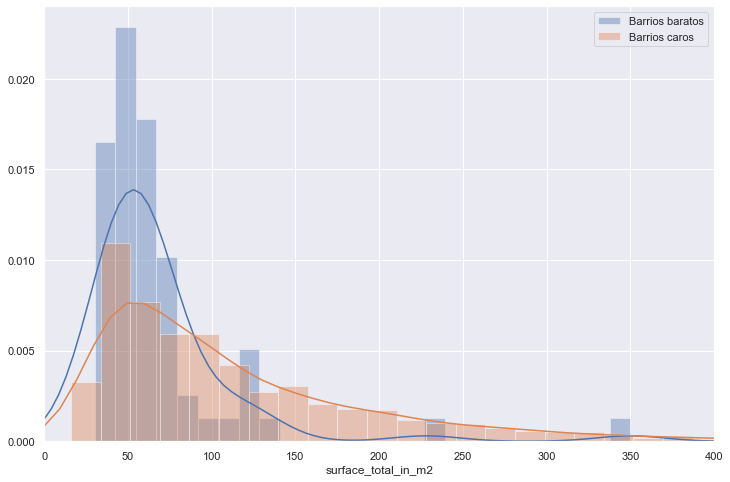

In [375]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

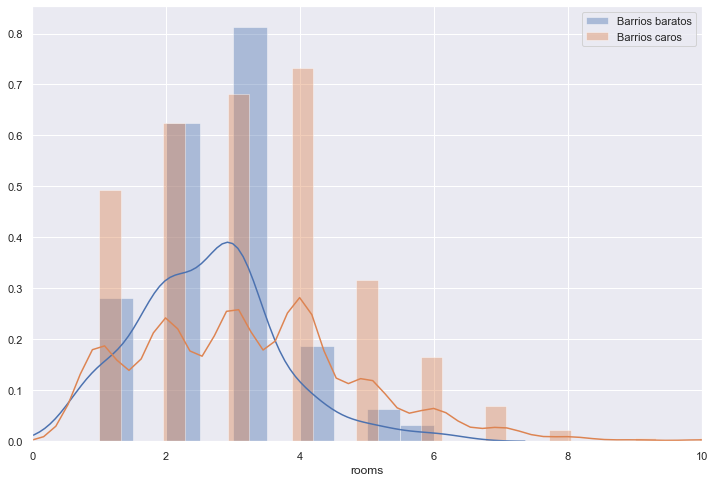

In [347]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

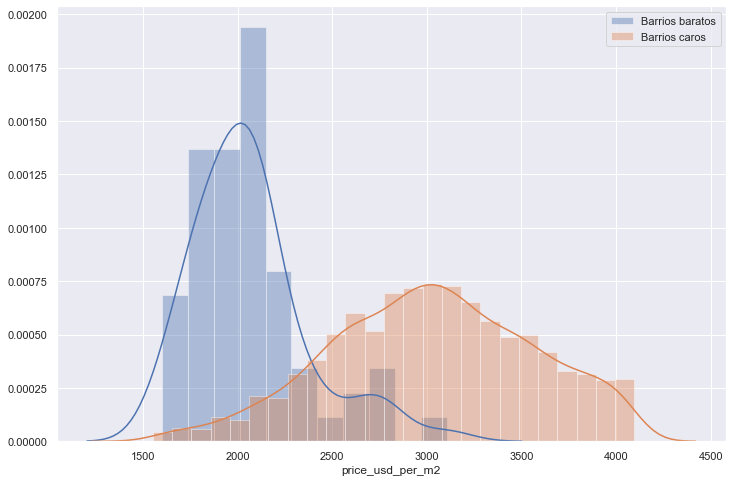

In [348]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [349]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([5, 6, 4])

Como algunos tienen 4 elementos, debemos quitarlos.

In [351]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]
df_filtered

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.0,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
35,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5825677,-58.4329982",-34.582568,-58.432998,198000.0,64.0,48.0,3093.750000,NaN,2.0,NaN,https://www.properati.com.ar/1e4f0_venta_departamento_palermo-hollywood_balcon_terraza_luminoso_amenities_aire-acondicionado_arkis-inmobiliaria_eoh,PALERMO,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,2018-01-26,sell,apartment,|Argentina|Capital Federal|Villa Urquiza|,"-34.5869610349,-58.4991220286",-34.586961,-58.499122,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4up_venta_departamento_villa-urquiza_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0
18956,2018-01-26,sell,apartment,|Argentina|Capital Federal|Agronomía|,"-34.5857925673,-58.4991678032",-34.585793,-58.499168,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4uq_venta_departamento_agronomia_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0
18959,2018-01-29,sell,PH,|Argentina|Capital Federal|Villa Pueyrredón|,"-34.5848,-58.490567",-34.584800,-58.490567,289900.0,180.0,180.0,1610.555556,NaN,4.0,NaN,https://www.properati.com.ar/1k7w1_venta_ph_villa-pueyrredon_lavadero_parrilla_patio_quincho_terraza_luminoso_amoblado_impecable_placard_aire-acondicionado_re-max-premium-ii,VILLA PUEYRREDON,12.0
18960,2018-01-31,sell,apartment,|Argentina|Capital Federal|Villa Pueyrredón|,"-34.582448,-58.507942",-34.582448,-58.507942,115000.0,50.0,50.0,2300.000000,6.0,2.0,NaN,https://www.properati.com.ar/1kb1t_venta_departamento_villa-pueyrredon_luminoso_placard_re-max-lagos,VILLA PUEYRREDON,12.0


In [352]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [353]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]
df_filtered_barrio_not_match

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_publicado
40,2017-09-01,sell,apartment,|Argentina|Capital Federal|Barrio Norte|,"-34.57548904,-58.41962433",-34.575489,-58.419624,510000.0,239.0,127.0,2133.891213,NaN,2.0,NaN,https://www.properati.com.ar/1e66w_venta_departamento_barrio-norte_de-maria_4300_baulera_patio_subte-linea-d_apto-credito-hipotecario_grupo-zeta-inmobiliaria,PALERMO,14.0,BARRIO NORTE
42,2017-09-01,sell,apartment,|Argentina|Capital Federal|Nuñez|,"-34.5672629609,-58.4318401926",-34.567263,-58.431840,640000.0,200.0,185.0,3200.000000,NaN,4.0,18000.0,https://www.properati.com.ar/1e6hy_venta_departamento_nunez_san-benito-de-palermo_1500_balcon_baulera_suite_lavadero_toilette_vestidor_lujoso_dependencias_garage_aire-acondicionado_filippo-propiedades_9im,PALERMO,14.0,NUNEZ
43,2017-09-01,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5670278,-58.4353992",-34.567028,-58.435399,590000.0,168.0,157.0,3511.904762,NaN,4.0,20000.0,https://www.properati.com.ar/1e6s5_venta_departamento_belgrano_soldado-de-la-independencia_900_balcon_baulera_suite_lavadero_toilette_vestidor_luminoso_lujoso_garage_impecable_aire-acondicionado_shenk-inmobiliaria_gkj,PALERMO,14.0,BELGRANO
71,2017-09-05,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5735693694,-58.4384186227",-34.573569,-58.438419,260000.0,126.0,119.0,2063.492063,NaN,5.0,8232.0,https://www.properati.com.ar/1ebp1_venta_departamento_belgrano_cabildo-av-_200_balcon_lavadero_luminoso_garage_subte-linea-d_cabildo-500,PALERMO,14.0,BELGRANO
72,2017-09-05,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5735693694,-58.4384186227",-34.573569,-58.438419,260000.0,126.0,119.0,2063.492063,NaN,4.0,8232.0,https://www.properati.com.ar/1ebp2_venta_departamento_belgrano_cabildo-av-_200_balcon_lavadero_luminoso_dependencias_garage_subte-linea-d_cabildo-500,PALERMO,14.0,BELGRANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18943,2018-01-20,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.588297,-58.5015889",-34.588297,-58.501589,175000.0,65.0,50.0,2692.307692,NaN,3.0,NaN,https://www.properati.com.ar/1jyvc_venta_departamento_velez-sarsfield_balcon_baulera_suite_parrilla_terraza_aire-acondicionado_apto-credito-hipotecario_century-21-republicador,VILLA PUEYRREDON,12.0,BELGRANO
18948,2018-01-22,sell,apartment,|Argentina|Capital Federal|Villa Devoto|,"-34.5876068,-58.5053405",-34.587607,-58.505341,92500.0,37.0,37.0,2500.000000,NaN,2.0,1990.0,https://www.properati.com.ar/1k143_venta_departamento_villa-devoto_lavadero_sf-grupo-inmobiliario_ezs,VILLA PUEYRREDON,12.0,VILLA DEVOTO
18955,2018-01-26,sell,apartment,|Argentina|Capital Federal|Villa Urquiza|,"-34.5869610349,-58.4991220286",-34.586961,-58.499122,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4up_venta_departamento_villa-urquiza_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0,VILLA URQUIZA
18956,2018-01-26,sell,apartment,|Argentina|Capital Federal|Agronomía|,"-34.5857925673,-58.4991678032",-34.585793,-58.499168,145000.0,55.0,52.0,2636.363636,NaN,3.0,NaN,https://www.properati.com.ar/1k4uq_venta_departamento_agronomia_riveros-negocios-inmobiliarios,VILLA PUEYRREDON,12.0,AGRONOMIA


Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [357]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)
table

barrio_publicado,ABASTO,AGRONOMIA,ALMAGRO,BALVANERA,BARRACAS,BARRIO NORTE,BELGRANO,BOCA,BOEDO,CABALLITO,CATALINAS,CENTRO / MICROCENTRO,CHACARITA,COGHLAN,COLEGIALES,CONGRESO,CONSTITUCION,FLORES,FLORESTA,LA PLATA,LAS CANITAS,LINIERS,MATADEROS,MONSERRAT,MONTE CASTRO,NUNEZ,ONCE,PALERMO,PARQUE CENTENARIO,PARQUE CHACABUCO,PARQUE CHAS,PARQUE PATRICIOS,PATERNAL,POMPEYA,PUERTO MADERO,RECOLETA,RETIRO,SAAVEDRA,SAN CRISTOBAL,SAN NICOLAS,SAN TELMO,TRES DE FEBRERO,TRIBUNALES,VERSALLES,VILLA CRESPO,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GENERAL MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA SANTA RITA,VILLA URQUIZA
barrio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AGRONOMIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,10,0,0
ALMAGRO,5,0,0,2,0,0,2,0,10,24,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,16,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0
BALVANERA,26,0,23,0,0,35,1,0,3,1,0,1,0,0,0,25,1,0,0,0,0,0,0,3,0,0,63,1,0,0,0,0,0,0,0,12,0,0,15,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
BARRACAS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
BELGRANO,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
BOCA,0,0,0,0,13,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
BOEDO,0,0,4,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CABALLITO,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,16,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0
CHACARITA,0,0,0,1,0,0,0,0,0,0,0,0,0,1,48,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0


Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.